<a href="https://colab.research.google.com/github/chihoang/Springboard_mec-mini-projects/blob/main/Mini_Project_Tree_Based_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. 

**Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set**.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [ ]:
### 1/4/23: mount to the datasets in Google Drive ###
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

### ** Load data

In [ ]:
# Your code here! :)
path = '/content/gdrive/MyDrive/Colab Notebooks/mec-mini-projects-master/mec-13.5.1-tree-based-algorithms-mini-project/GermanCredit.csv.zip'
df = pd.read_csv(path)

In [ ]:
df.tail()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
995,12,1736,3,4,31,1,1,1,1,Good,...,0,0,1,0,1,0,0,1,0,0
996,30,3857,4,4,40,1,1,0,1,Good,...,0,0,1,0,1,0,0,0,0,1
997,12,804,4,4,38,1,1,1,1,Good,...,0,0,1,0,1,0,0,0,1,0
998,45,1845,4,4,23,1,1,0,1,Bad,...,0,0,1,0,0,1,0,0,1,0
999,45,4576,3,4,27,1,1,1,1,Good,...,0,0,1,0,1,0,0,0,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 62 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Duration                                1000 non-null   int64 
 1   Amount                                  1000 non-null   int64 
 2   InstallmentRatePercentage               1000 non-null   int64 
 3   ResidenceDuration                       1000 non-null   int64 
 4   Age                                     1000 non-null   int64 
 5   NumberExistingCredits                   1000 non-null   int64 
 6   NumberPeopleMaintenance                 1000 non-null   int64 
 7   Telephone                               1000 non-null   int64 
 8   ForeignWorker                           1000 non-null   int64 
 9   Class                                   1000 non-null   object
 10  CheckingAccountStatus.lt.0              1000 non-null   int64 
 11  Check

In [ ]:
df.describe()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,CheckingAccountStatus.lt.0,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.596000,0.963000,0.274000,...,0.13900,0.047000,0.814000,0.179000,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.490943,0.188856,0.446232,...,0.34612,0.211745,0.389301,0.383544,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000,1.000000,0.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000


### Handle output/target

In [ ]:
### see full columns of df
pd.set_option('display.max_columns', None)
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CheckingAccountStatus.none,CreditHistory.NoCredit.AllPaid,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical,Purpose.NewCar,Purpose.UsedCar,Purpose.Furniture.Equipment,Purpose.Radio.Television,Purpose.DomesticAppliance,Purpose.Repairs,Purpose.Education,Purpose.Vacation,Purpose.Retraining,Purpose.Business,Purpose.Other,SavingsAccountBonds.lt.100,SavingsAccountBonds.100.to.500,SavingsAccountBonds.500.to.1000,SavingsAccountBonds.gt.1000,SavingsAccountBonds.Unknown,EmploymentDuration.lt.1,EmploymentDuration.1.to.4,EmploymentDuration.4.to.7,EmploymentDuration.gt.7,EmploymentDuration.Unemployed,Personal.Male.Divorced.Seperated,Personal.Female.NotSingle,Personal.Male.Single,Personal.Male.Married.Widowed,Personal.Female.Single,OtherDebtorsGuarantors.None,OtherDebtorsGuarantors.CoApplicant,OtherDebtorsGuarantors.Guarantor,Property.RealEstate,Property.Insurance,Property.CarOther,Property.Unknown,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,Good,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,Bad,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,Good,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,Good,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,Bad,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
# handle output/target 'Class'
df['Class'] = df['Class'].map({'Good':1, 'Bad':0})

In [ ]:
df.head(1)

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CheckingAccountStatus.none,CreditHistory.NoCredit.AllPaid,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical,Purpose.NewCar,Purpose.UsedCar,Purpose.Furniture.Equipment,Purpose.Radio.Television,Purpose.DomesticAppliance,Purpose.Repairs,Purpose.Education,Purpose.Vacation,Purpose.Retraining,Purpose.Business,Purpose.Other,SavingsAccountBonds.lt.100,SavingsAccountBonds.100.to.500,SavingsAccountBonds.500.to.1000,SavingsAccountBonds.gt.1000,SavingsAccountBonds.Unknown,EmploymentDuration.lt.1,EmploymentDuration.1.to.4,EmploymentDuration.4.to.7,EmploymentDuration.gt.7,EmploymentDuration.Unemployed,Personal.Male.Divorced.Seperated,Personal.Female.NotSingle,Personal.Male.Single,Personal.Male.Married.Widowed,Personal.Female.Single,OtherDebtorsGuarantors.None,OtherDebtorsGuarantors.CoApplicant,OtherDebtorsGuarantors.Guarantor,Property.RealEstate,Property.Insurance,Property.CarOther,Property.Unknown,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0


In [ ]:
df['Class'].value_counts()

1    700
0    300
Name: Class, dtype: int64

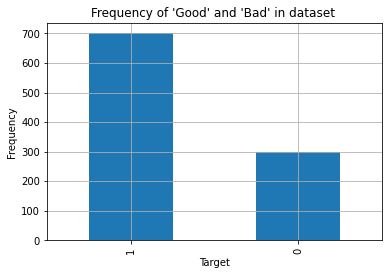

In [ ]:
## count number of outputs?
# plt.rcParams["figure.figsize"] = (9,7)
df['Class'].value_counts().plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Frequency of \'Good\' and \'Bad\' in dataset ')
plt.grid('True')
plt.show()

**Observation 1**:

We see that the ratio of `Good` and `Bad` is roughly 2.3:1 which means the dataset is imbalanced. We can check the effect of this imbalance in the following. 



In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
# Split data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)

In [ ]:
print(type(X_train))
print(X_train.shape)
print(type(y_train))
print(y_train.shape)

print(type(X_test))
print(X_test.shape)
print(type(y_test))
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
(800, 61)
<class 'pandas.core.series.Series'>
(800,)
<class 'pandas.core.frame.DataFrame'>
(200, 61)
<class 'pandas.core.series.Series'>
(200,)


In [ ]:
df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,CheckingAccountStatus.lt.0,CheckingAccountStatus.0.to.200,CheckingAccountStatus.gt.200,CheckingAccountStatus.none,CreditHistory.NoCredit.AllPaid,CreditHistory.ThisBank.AllPaid,CreditHistory.PaidDuly,CreditHistory.Delay,CreditHistory.Critical,Purpose.NewCar,Purpose.UsedCar,Purpose.Furniture.Equipment,Purpose.Radio.Television,Purpose.DomesticAppliance,Purpose.Repairs,Purpose.Education,Purpose.Vacation,Purpose.Retraining,Purpose.Business,Purpose.Other,SavingsAccountBonds.lt.100,SavingsAccountBonds.100.to.500,SavingsAccountBonds.500.to.1000,SavingsAccountBonds.gt.1000,SavingsAccountBonds.Unknown,EmploymentDuration.lt.1,EmploymentDuration.1.to.4,EmploymentDuration.4.to.7,EmploymentDuration.gt.7,EmploymentDuration.Unemployed,Personal.Male.Divorced.Seperated,Personal.Female.NotSingle,Personal.Male.Single,Personal.Male.Married.Widowed,Personal.Female.Single,OtherDebtorsGuarantors.None,OtherDebtorsGuarantors.CoApplicant,OtherDebtorsGuarantors.Guarantor,Property.RealEstate,Property.Insurance,Property.CarOther,Property.Unknown,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0


In [ ]:
# Setup pipeline
# All columns are numerical, and NO categorical cols

# Define numerical pipeline
num_pipe = Pipeline(
    steps = [("scaler", StandardScaler() ) ]
)

preprocessor = ColumnTransformer(
    transformers = [
        ("num", num_pipe, X.columns),
    ]
)

# colsample  by tree, n estimators, max depth
dtree = Pipeline(
    steps = [("preprocessor", preprocessor), \
             ("DecisionTree", DecisionTreeClassifier(min_samples_leaf=2, random_state=1))] 
)


### Use original dataset



In [ ]:
# Set initial model
dtree.fit(X_train, y_train)
y_pred = dtree.predict(X_test)

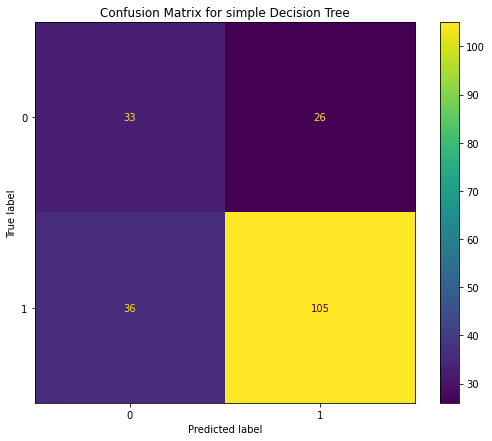

In [ ]:
## plot confusion matrix
fig, ax = plt.subplots(figsize=(9,7))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax)
_ = ax.set_title(
    f"Confusion Matrix for simple Decision Tree"
)

plt.show()

In [ ]:
print( classification_report(y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.48      0.56      0.52        59
           1       0.80      0.74      0.77       141

    accuracy                           0.69       200
   macro avg       0.64      0.65      0.64       200
weighted avg       0.71      0.69      0.70       200



#### GridSearchCV

In [ ]:
### write a function for gridsearchCV to find the best model
def gridsearch_best_model(model, params, n_folds, score, X_train, y_train, X_test, y_test):
  tune_model = GridSearchCV(model, param_grid=params, cv=n_folds, scoring=score)
  tune_model.fit(X_train, y_train)

  best_model = tune_model.best_estimator_
  best_score = tune_model.best_score_
  y_pred = best_model.predict(X_test)

  # Print results
  print("Best parameters:", tune_model.best_params_)
  print("Cross-validated accuracy score on training data: {:0.4f}".format(tune_model.best_score_))
  print('\n')
  print(classification_report(y_test, y_pred))

  return best_model, best_score


In [ ]:
# Set parameters
params = {'DecisionTree__criterion': ['gini', 'entropy'], 
           'DecisionTree__splitter': ['best', 'random'], 
           'DecisionTree__max_depth': range(2, 30), 
           'DecisionTree__max_features': range(10,60)}
n_folds = 5
score_use = 'f1_weighted'

dtree_ori_best, _ = gridsearch_best_model(dtree, params, n_folds, score_use, \
                                       X_train, y_train, X_test, y_test)

Best parameters: {'DecisionTree__criterion': 'entropy', 'DecisionTree__max_depth': 5, 'DecisionTree__max_features': 40, 'DecisionTree__splitter': 'random'}
Cross-validated accuracy score on training data: 0.7367


              precision    recall  f1-score   support

           0       0.63      0.46      0.53        59
           1       0.80      0.89      0.84       141

    accuracy                           0.76       200
   macro avg       0.71      0.67      0.68       200
weighted avg       0.75      0.76      0.75       200



#### Best model

In [ ]:
# dtree_ori_best = Pipeline(
#     steps = [("preprocessor", preprocessor), \
#              ("DecisionTree", DecisionTreeClassifier(min_samples_leaf=2, \
#                                                      random_state=1, \
#                                                      criterion='entropy', \
#                                                      max_depth=5, \
#                                                      max_features=40, 
#                                                      splitter='random'))] 
# )

dtree_ori_best.fit(X_train, y_train)

y_test_pred = dtree_ori_best.predict(X_test)

tmp = score(y_test, y_test_pred, average='macro') 
report_dtree_ori_best = tmp[:-1]
print('precision    recall  f1-score (macro)')
print(report_dtree_ori_best)

precision    recall  f1-score (macro)
(0.7120426603466153, 0.6720759706695516, 0.6841689696012634)


### Oversampling with SMOTE

In [ ]:
## approach: use imblearn
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.pipeline import make_pipeline

params = {'criterion': ['gini', 'entropy'], 
           'splitter': ['best', 'random'], 
           'max_depth': range(2, 30), 
           'max_features': range(10,60)}

dtree_smote = make_pipeline(
                    preprocessor,
                    SMOTE(random_state=42),
                    DecisionTreeClassifier(min_samples_leaf=2, random_state=1)
)
new_params = {'decisiontreeclassifier__' + key: params[key] for key in params}

dtree_smote_best, _ = gridsearch_best_model(dtree_smote, new_params, n_folds, score_use, \
                                       X_train, y_train, X_test, y_test)


Best parameters: {'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 11, 'decisiontreeclassifier__max_features': 44, 'decisiontreeclassifier__splitter': 'random'}
Cross-validated accuracy score on training data: 0.7356


              precision    recall  f1-score   support

           0       0.52      0.51      0.51        59
           1       0.80      0.80      0.80       141

    accuracy                           0.71       200
   macro avg       0.66      0.65      0.66       200
weighted avg       0.71      0.71      0.71       200



In [ ]:
## best SMOTE model
# dtree_smote_best = make_pipeline(
#                     preprocessor,
#                     SMOTE(random_state=42),
#                     DecisionTreeClassifier(min_samples_leaf=2, \
#                                            random_state=1, \
#                                            criterion='entropy', \
#                                            max_depth=11, \
#                                            max_features=44, 
#                                            splitter='random')
# )

dtree_smote_best.fit(X_train, y_train)

y_test_pred = dtree_smote_best.predict(X_test)

tmp = score(y_test, y_test_pred, average='macro') 
report_dtree_smote_best = tmp[:-1]
print(report_dtree_smote_best)

(0.6565080135988344, 0.6549465079937493, 0.6557035426293376)


### Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

dtree_under = make_pipeline(
                    preprocessor,
                    RandomUnderSampler(random_state=42),
                    DecisionTreeClassifier(min_samples_leaf=2, random_state=1)
)

dtree_under_best, _ = gridsearch_best_model(dtree_under, new_params, n_folds, score_use, \
                                       X_train, y_train, X_test, y_test)


Best parameters: {'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 2, 'decisiontreeclassifier__max_features': 42, 'decisiontreeclassifier__splitter': 'random'}
Cross-validated accuracy score on training data: 0.7152


              precision    recall  f1-score   support

           0       0.53      0.34      0.41        59
           1       0.76      0.87      0.81       141

    accuracy                           0.71       200
   macro avg       0.64      0.61      0.61       200
weighted avg       0.69      0.71      0.69       200



In [ ]:
## best model
# dtree_under_best = make_pipeline(
#                     preprocessor,
#                     RandomUnderSampler(random_state=42),
#                     DecisionTreeClassifier(min_samples_leaf=2, \
#                                            random_state=1, \
#                                            criterion='gini', \
#                                            max_depth=2, \
#                                            max_features=42, 
#                                            splitter='random')
# )

dtree_under_best.fit(X_train, y_train)

y_test_pred = dtree_under_best.predict(X_test)

tmp = score(y_test, y_test_pred, average='macro') 
report_dtree_under_best = tmp[:-1]
print(report_dtree_under_best)

(0.6427875243664718, 0.6056617381896863, 0.6121261610697152)


### *** Put all together

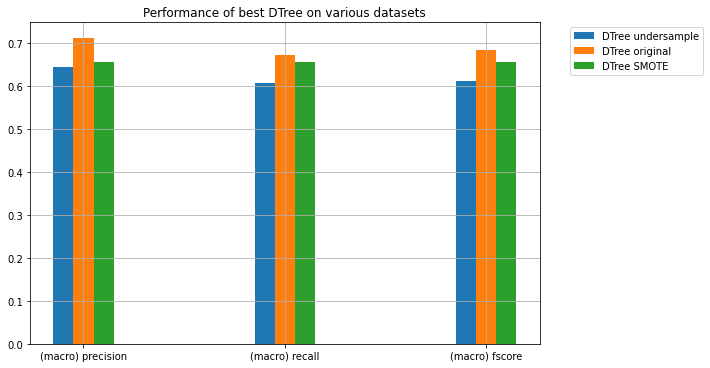

In [ ]:
import numpy as np
r = np.arange(3)
width = 0.1

plt.figure(figsize=(10,5)) 
bar1 = plt.bar(r, report_dtree_under_best, width=width)
bar2 = plt.bar(r + width, report_dtree_ori_best, width=width)
bar3 = plt.bar(r + 2*width, report_dtree_smote_best, width=width)

plt.grid('True')
plt.xticks(r+width,['(macro) precision', '(macro) recall', '(macro) fscore'])
plt.legend( (bar1, bar2, bar3), \
            ('DTree undersample', 'DTree original', 'DTree SMOTE'), \
            bbox_to_anchor=(1.05, 1.0), loc='upper left' )
plt.tight_layout()
plt.title('Performance of best DTree on various datasets')

plt.show()

**Observation:**

- Generally, the rule of thumb is that the number of training samples should be more than 10 times the number of features. For this example, # features = 62 while # training samples is around 500, thus there is a lack of training data and the ML models may not train and perform well.  

- Among three strategies: undersampling, original and SMOTE (oversampling), the undersampling gives the worst performance due to lost of data, the original and SMOTE perform better. 

<!-- - It seems that the current parameter range (for GridSearchCV) is not sufficient for SMOTE to work well, although that range is sufficient for original and undersampling. 

- The reason is because SMOTE has more data points hence it may need deeper trees to learn and classify well. 

- The best model is the Decision Tree with original dataset.  -->


### ** After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [ ]:
!pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 KB 3.5 MB/s eta 0:00:00


If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

In [ ]:
# Your code here! :)
## get feature_names & target
target = 'Class'
features = list(X_train.columns)

In [ ]:
print(type(features))
print(features)

<class 'list'>
['Duration', 'Amount', 'InstallmentRatePercentage', 'ResidenceDuration', 'Age', 'NumberExistingCredits', 'NumberPeopleMaintenance', 'Telephone', 'ForeignWorker', 'CheckingAccountStatus.lt.0', 'CheckingAccountStatus.0.to.200', 'CheckingAccountStatus.gt.200', 'CheckingAccountStatus.none', 'CreditHistory.NoCredit.AllPaid', 'CreditHistory.ThisBank.AllPaid', 'CreditHistory.PaidDuly', 'CreditHistory.Delay', 'CreditHistory.Critical', 'Purpose.NewCar', 'Purpose.UsedCar', 'Purpose.Furniture.Equipment', 'Purpose.Radio.Television', 'Purpose.DomesticAppliance', 'Purpose.Repairs', 'Purpose.Education', 'Purpose.Vacation', 'Purpose.Retraining', 'Purpose.Business', 'Purpose.Other', 'SavingsAccountBonds.lt.100', 'SavingsAccountBonds.100.to.500', 'SavingsAccountBonds.500.to.1000', 'SavingsAccountBonds.gt.1000', 'SavingsAccountBonds.Unknown', 'EmploymentDuration.lt.1', 'EmploymentDuration.1.to.4', 'EmploymentDuration.4.to.7', 'EmploymentDuration.gt.7', 'EmploymentDuration.Unemployed', 'Per

In [ ]:
for component in dtree_ori_best[:-1]:
    if hasattr(component, 'get_feature_names'):
        feature_names = component.get_feature_names_out(features)

In [ ]:
print(type(feature_names))
print(feature_names)

<class 'numpy.ndarray'>
['num__Duration' 'num__Amount' 'num__InstallmentRatePercentage'
 'num__ResidenceDuration' 'num__Age' 'num__NumberExistingCredits'
 'num__NumberPeopleMaintenance' 'num__Telephone' 'num__ForeignWorker'
 'num__CheckingAccountStatus.lt.0' 'num__CheckingAccountStatus.0.to.200'
 'num__CheckingAccountStatus.gt.200' 'num__CheckingAccountStatus.none'
 'num__CreditHistory.NoCredit.AllPaid'
 'num__CreditHistory.ThisBank.AllPaid' 'num__CreditHistory.PaidDuly'
 'num__CreditHistory.Delay' 'num__CreditHistory.Critical'
 'num__Purpose.NewCar' 'num__Purpose.UsedCar'
 'num__Purpose.Furniture.Equipment' 'num__Purpose.Radio.Television'
 'num__Purpose.DomesticAppliance' 'num__Purpose.Repairs'
 'num__Purpose.Education' 'num__Purpose.Vacation'
 'num__Purpose.Retraining' 'num__Purpose.Business' 'num__Purpose.Other'
 'num__SavingsAccountBonds.lt.100' 'num__SavingsAccountBonds.100.to.500'
 'num__SavingsAccountBonds.500.to.1000' 'num__SavingsAccountBonds.gt.1000'
 'num__SavingsAccountBond

In [ ]:
import dtreeviz

In [ ]:
tree_classifier = dtree_ori_best.steps[-1][1]

viz_model = dtreeviz.model(tree_classifier,
                           X_train=X_train, y_train=y_train,
                           feature_names=feature_names,
                           target_name=target, class_names=[0,1])

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


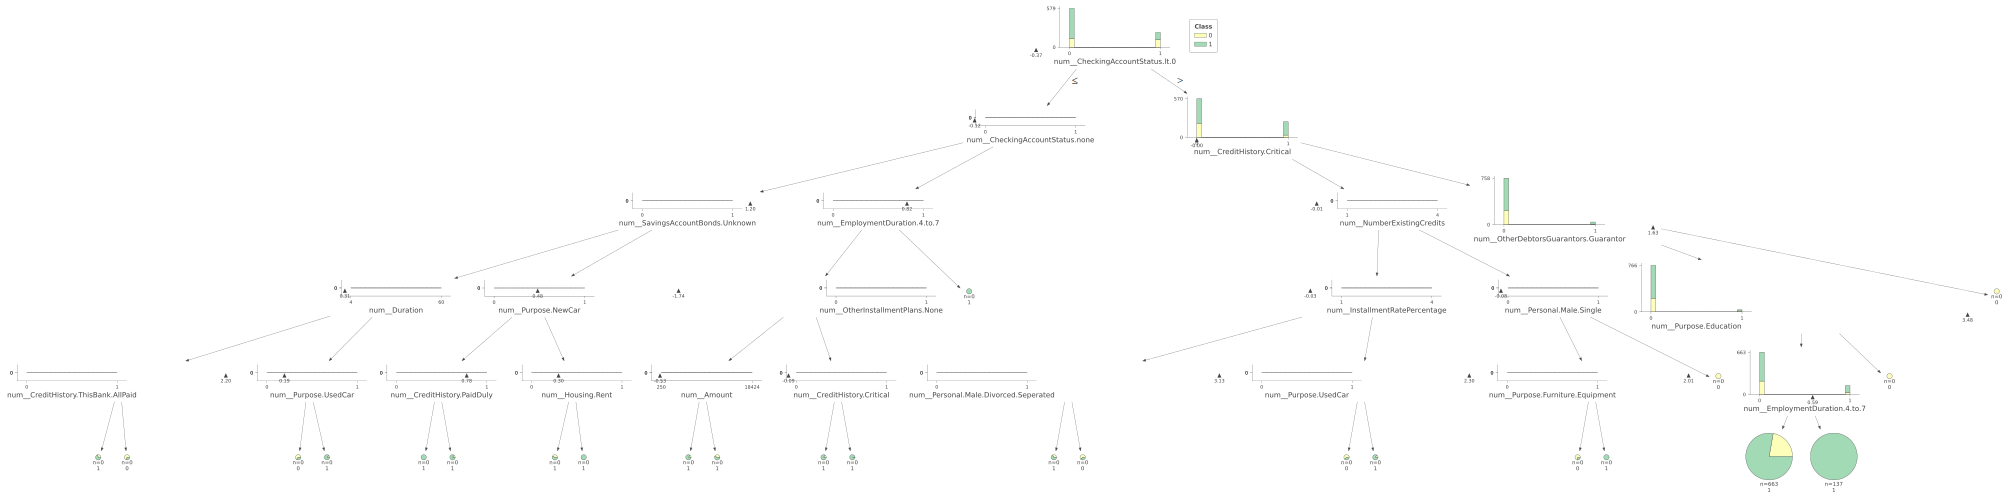

In [ ]:
## visualize tree 
# viz_model.view(scale=1.6)
viz_model.view(scale=0.8)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


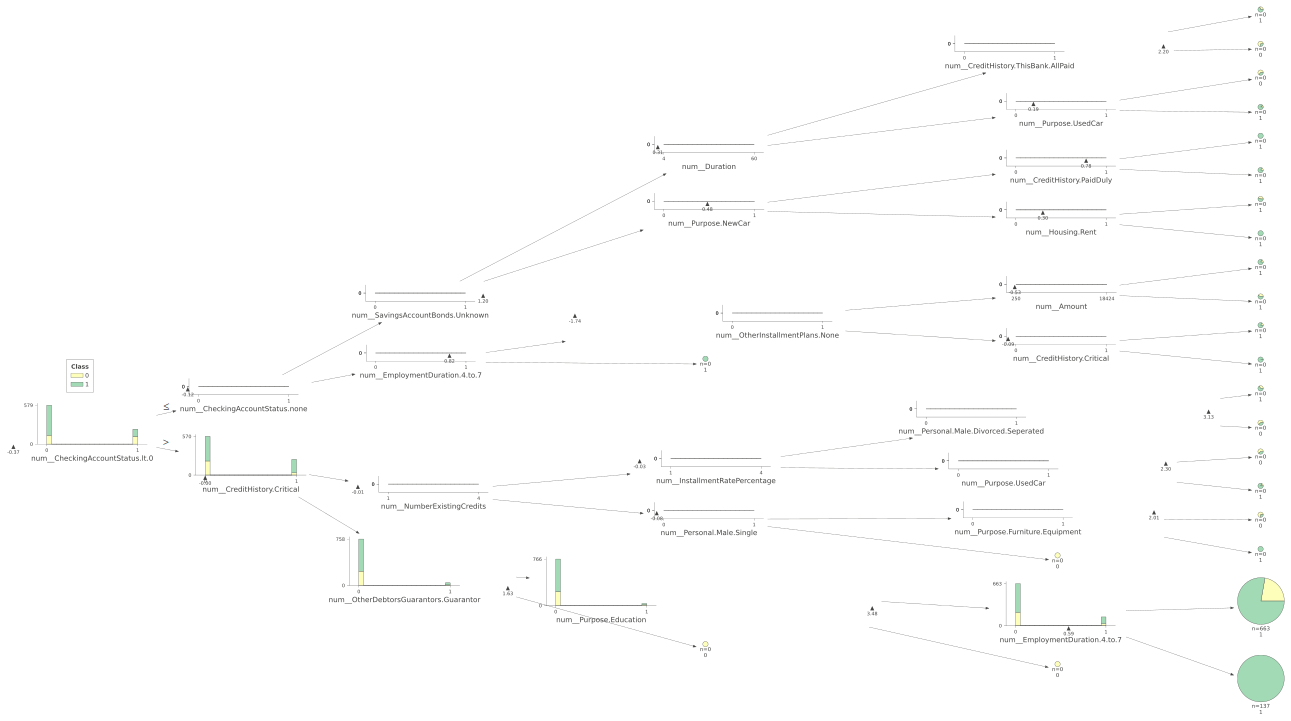

In [ ]:
viz_model.view(orientation="LR", scale=0.8)

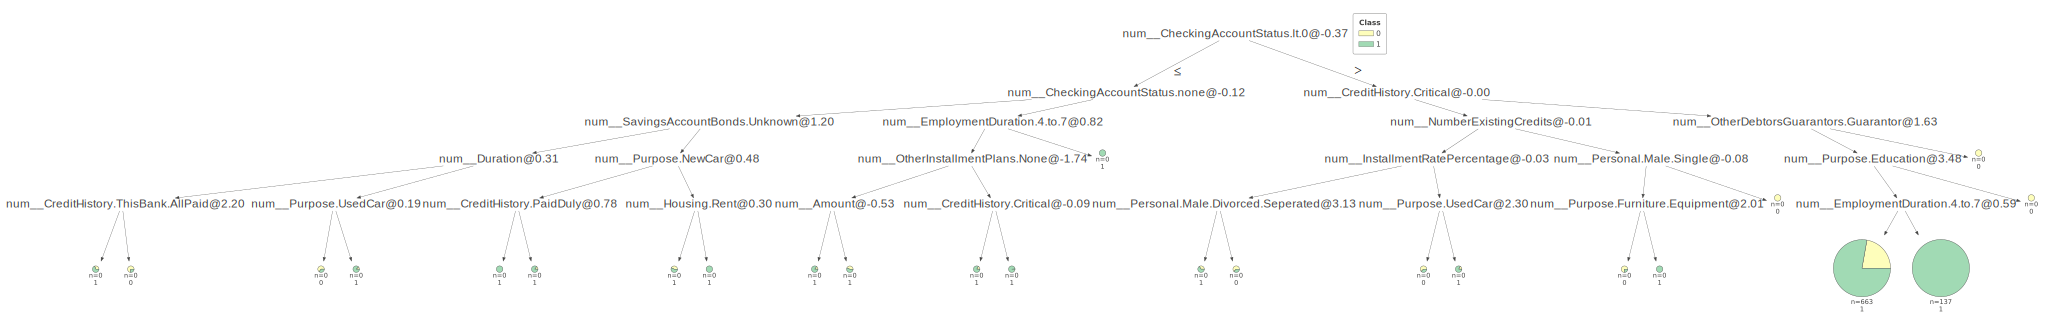

In [ ]:
viz_model.view(fancy=False, scale=1.2)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


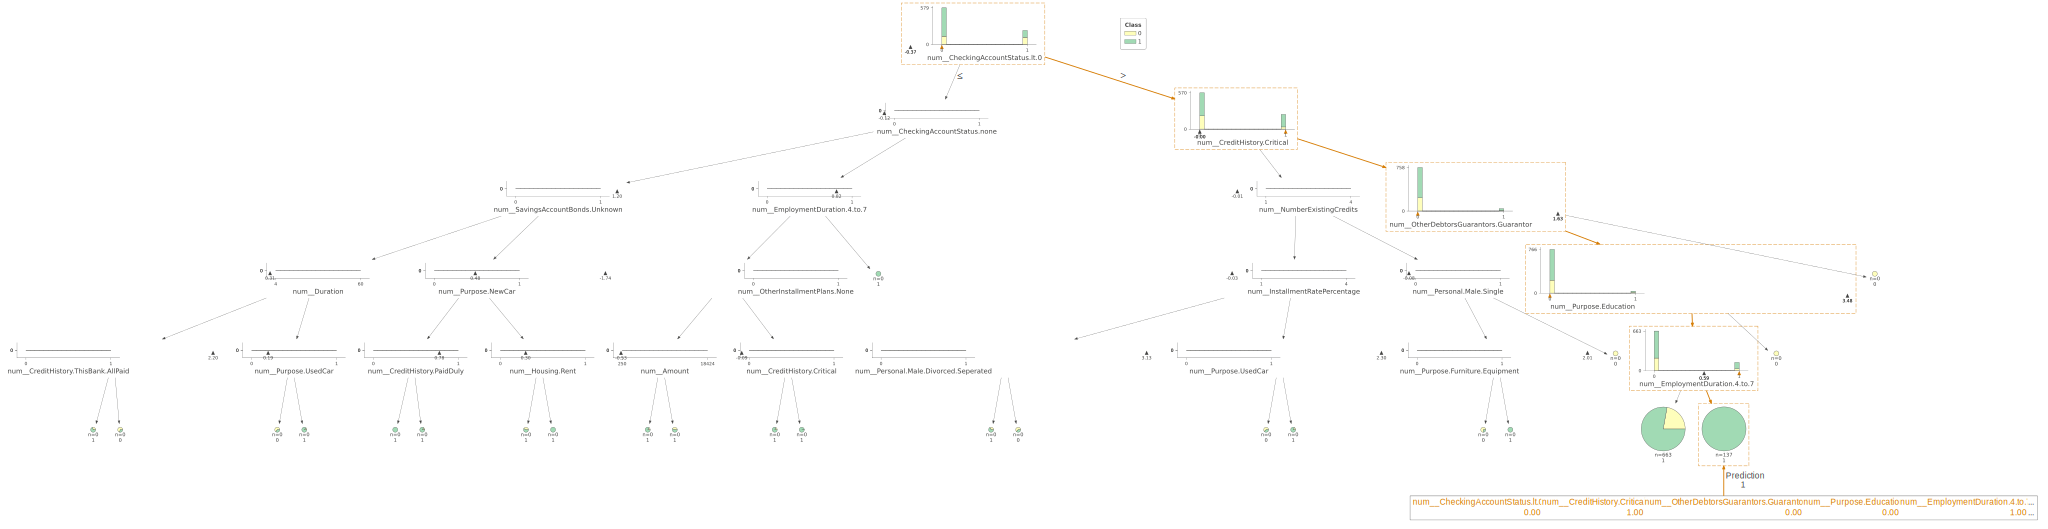

In [ ]:
## prediction path
x = X_train.iloc[10]
viz_model.view(x=x, scale=1.0)

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


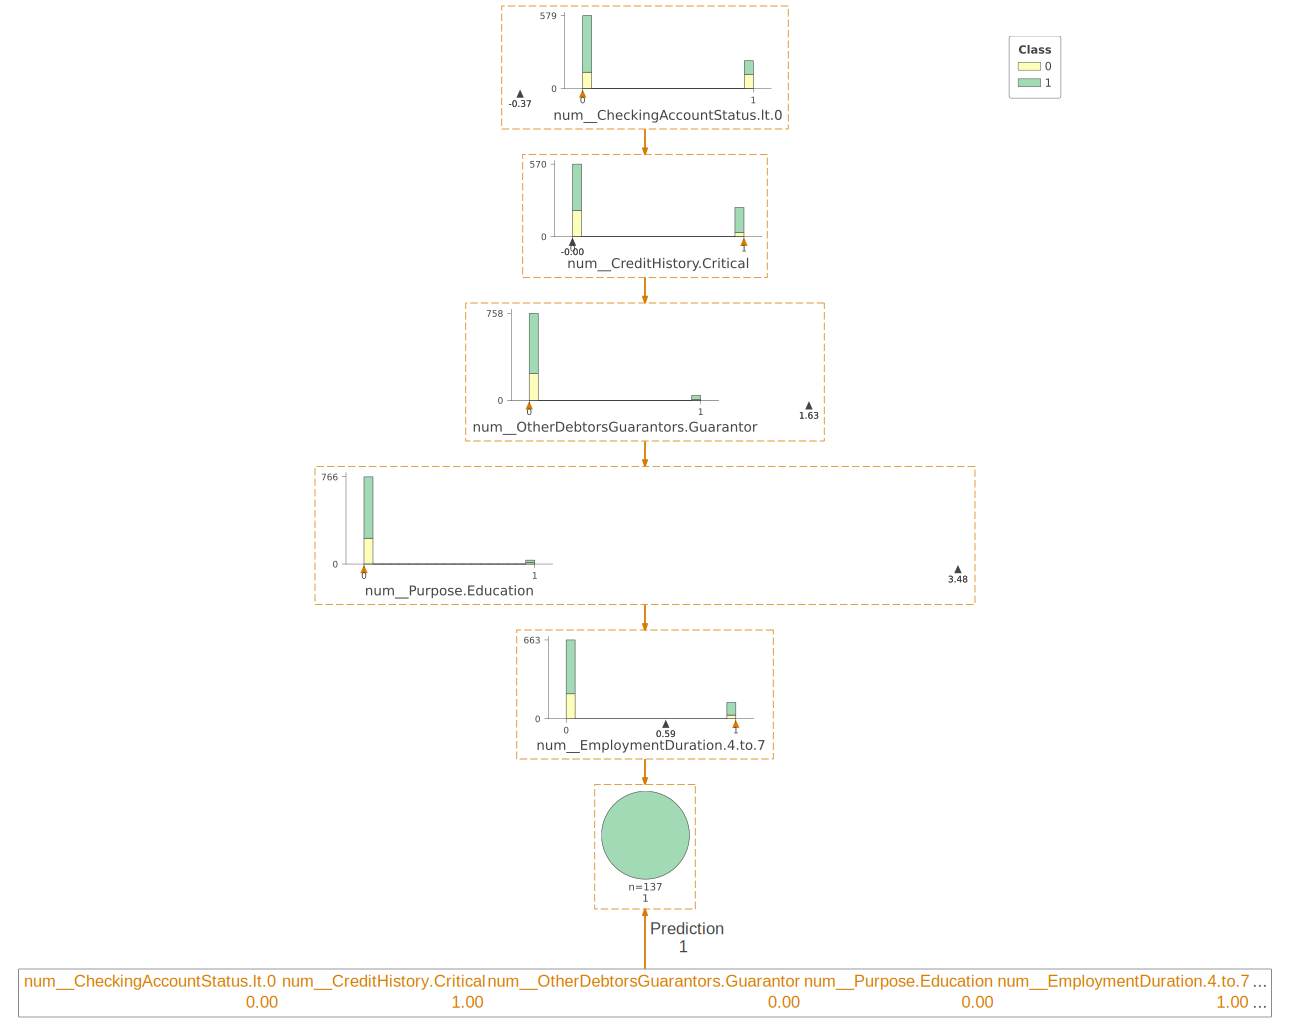

In [ ]:
viz_model.view(x=x, show_just_path=True, scale=1.5)

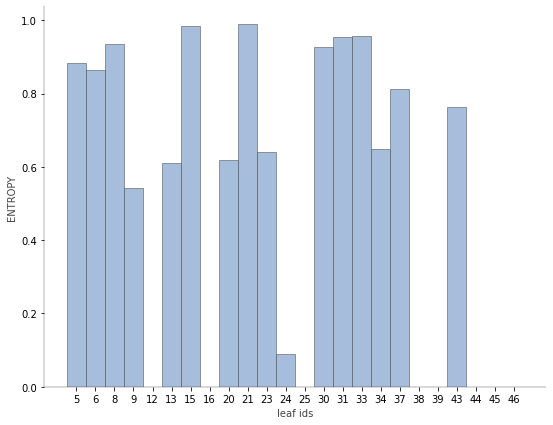

In [ ]:
## leaf info
viz_model.leaf_purity(figsize=(9,7))

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

** First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Your code here! :)
rf_smote = make_pipeline(
                    preprocessor,
                    SMOTE(random_state=42),
                    RandomForestClassifier(random_state=1)
)

params = [{}]

rf_smote_best, _ = gridsearch_best_model(rf_smote, params, n_folds, score_use, \
                                       X_train, y_train, X_test, y_test)

Best parameters: {}
Cross-validated accuracy score on training data: 0.7526


              precision    recall  f1-score   support

           0       0.68      0.46      0.55        59
           1       0.80      0.91      0.85       141

    accuracy                           0.78       200
   macro avg       0.74      0.68      0.70       200
weighted avg       0.76      0.78      0.76       200



In [ ]:
rf_smote_best.fit(X_train, y_train)

y_test_pred = rf_smote_best.predict(X_test)

tmp = score(y_test, y_test_pred, average='macro') 
report_rf_smote_best = tmp[:-1]
print(report_rf_smote_best)

(0.7375, 0.6827142685418921, 0.6979764421624888)


As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

In [ ]:
# Your code here
importances = rf_smote_best._final_estimator.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_smote_best._final_estimator.estimators_], \
             axis=0)


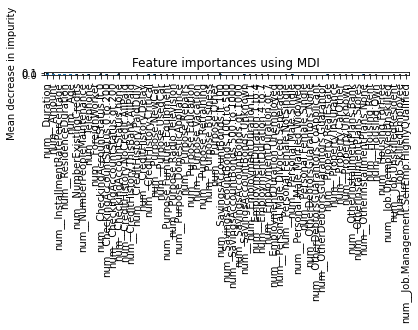

In [ ]:
## visualize 
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
## list HERE!
df_importances = pd.DataFrame([importances, std], index=['importances', 'std'], \
                              columns=list(X_train.columns))
df_importances = df_importances.transpose()
df_importances.sort_values('importances', ascending=False, inplace=True)

In [ ]:
df_importances.head(10)

,importances,std
Duration,0.073607,0.029474
CheckingAccountStatus.none,0.068250,0.057863
Amount,0.066480,0.021029
CheckingAccountStatus.lt.0,0.060220,0.050470
Age,0.054374,0.015690
SavingsAccountBonds.lt.100,0.040779,0.031545
CreditHistory.Critical,0.038413,0.030280
InstallmentRatePercentage,0.037935,0.017604
ResidenceDuration,0.036492,0.016377
CheckingAccountStatus.0.to.200,0.022627,0.019212


### ++ PDP method for visualization

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [ ]:
# !pip install pdpbox

While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

#### PDPs for one variable 

In [ ]:
# Your code here!
from sklearn.inspection import PartialDependenceDisplay

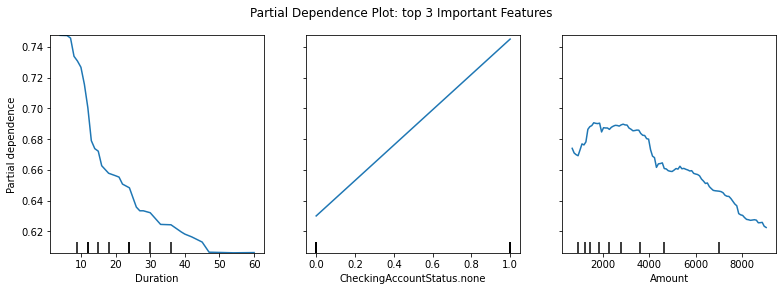

In [ ]:
## 1-way PDP plot of 'Duration'
vars = ['Duration', 'CheckingAccountStatus.none', 'Amount']
PartialDependenceDisplay.from_estimator(rf_smote_best, X_train, vars, kind='average')

cf = plt.gcf()
cf.suptitle("Partial Dependence Plot: top 3 Important Features");
cf.set_size_inches(13,4)


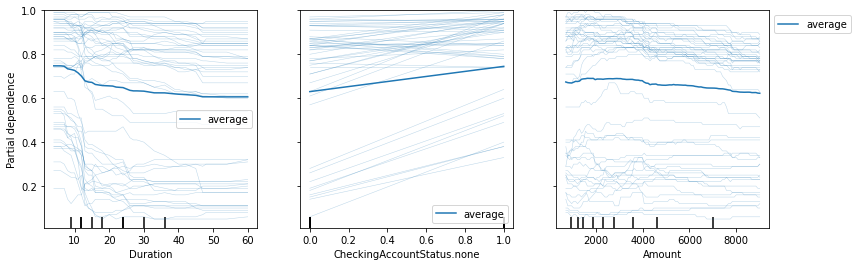

In [ ]:
n = 50
PartialDependenceDisplay.from_estimator(
    rf_smote_best, X_train, vars, kind="both", n_jobs=3, subsample=n
)
plt.legend(bbox_to_anchor=(1,1))

cf = plt.gcf()
# cf.suptitle("Partial Dependence Plot: top 3 Important Features");
cf.set_size_inches(13,4)

#### PDPs for multiple variables 

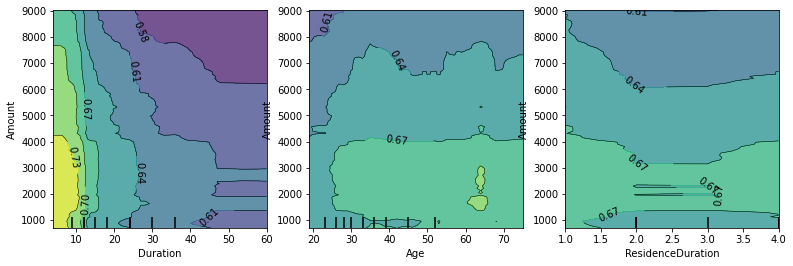

In [ ]:
features = [('Duration', 'Amount'), ('Age', 'Amount'), ('ResidenceDuration', 'Amount')]
PartialDependenceDisplay.from_estimator(rf_smote_best, X_train, features)

cf = plt.gcf()
cf.set_size_inches(13,4)

# plt.legend(bbox_to_anchor=(1,1))
# cf.suptitle("Partial Dependence Plot: top 3 Important Features");

## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [ ]:
# !conda install -c anaconda py-xgboost

/bin/bash: conda: command not found


In [ ]:
# !conda install -c conda-forge catboost

/bin/bash: conda: command not found


In [ ]:
# !conda install -c conda-forge lightgbm

Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

## XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb_smote = make_pipeline(
                    preprocessor,
                    SMOTE(random_state=42),
                    XGBClassifier(seed=42, nthread=1)
                    # XGBClassifier(use_label_encoder=False, eval_metric='logloss')
)

params = [{}]

xgb_smote_best, _ = gridsearch_best_model(xgb_smote, params, n_folds, score_use, \
                                       X_train, y_train, X_test, y_test)

Best parameters: {}
Cross-validated accuracy score on training data: 0.7571


              precision    recall  f1-score   support

           0       0.55      0.41      0.47        59
           1       0.78      0.86      0.81       141

    accuracy                           0.73       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.71      0.72      0.71       200



In [ ]:
xgb_smote_best.fit(X_train, y_train)

y_test_pred = xgb_smote_best.predict(X_test)

tmp = score(y_test, y_test_pred, average='macro') 
report_xgb_smote_best = tmp[:-1]
print(report_xgb_smote_best)

(0.6605477855477855, 0.6324678446928718, 0.6404171161452714)


## Catboost

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.3 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
cb_smote = make_pipeline(
                    preprocessor,
                    SMOTE(random_state=42),
                    CatBoostClassifier(random_seed=1)
)

params = [{}]

cb_smote_best, _ = gridsearch_best_model(cb_smote, params, n_folds, score_use, \
                                       X_train, y_train, X_test, y_test)

Streaming output truncated to the last 5000 lines.
17:	learn: 0.6302925	total: 111ms	remaining: 6.06s
18:	learn: 0.6271454	total: 116ms	remaining: 6s
19:	learn: 0.6241882	total: 122ms	remaining: 5.96s
20:	learn: 0.6212202	total: 126ms	remaining: 5.89s
21:	learn: 0.6179444	total: 144ms	remaining: 6.41s
22:	learn: 0.6151633	total: 151ms	remaining: 6.4s
23:	learn: 0.6118183	total: 155ms	remaining: 6.32s
24:	learn: 0.6081291	total: 167ms	remaining: 6.53s
25:	learn: 0.6057514	total: 180ms	remaining: 6.76s
26:	learn: 0.6030112	total: 189ms	remaining: 6.83s
27:	learn: 0.6003308	total: 206ms	remaining: 7.13s
28:	learn: 0.5975373	total: 218ms	remaining: 7.29s
29:	learn: 0.5946649	total: 230ms	remaining: 7.43s
30:	learn: 0.5927385	total: 245ms	remaining: 7.64s
31:	learn: 0.5898375	total: 258ms	remaining: 7.8s
32:	learn: 0.5876395	total: 269ms	remaining: 7.89s
33:	learn: 0.5855219	total: 280ms	remaining: 7.96s
34:	learn: 0.5831023	total: 294ms	remaining: 8.12s
35:	learn: 0.5807473	total: 307ms	re

In [ ]:
cb_smote_best.fit(X_train, y_train)

y_test_pred = cb_smote_best.predict(X_test)

tmp = score(y_test, y_test_pred, average='macro') 
report_cb_smote_best = tmp[:-1]
print(report_cb_smote_best)

Learning rate set to 0.010805
0:	learn: 0.6879851	total: 15.3ms	remaining: 15.2s
1:	learn: 0.6843405	total: 29ms	remaining: 14.4s
2:	learn: 0.6796547	total: 34.5ms	remaining: 11.5s
3:	learn: 0.6750457	total: 39.8ms	remaining: 9.9s
4:	learn: 0.6708083	total: 45.5ms	remaining: 9.05s
5:	learn: 0.6667265	total: 51ms	remaining: 8.45s
6:	learn: 0.6619933	total: 56.4ms	remaining: 8s
7:	learn: 0.6582484	total: 61.1ms	remaining: 7.58s
8:	learn: 0.6549555	total: 65.8ms	remaining: 7.24s
9:	learn: 0.6507044	total: 70.5ms	remaining: 6.98s
10:	learn: 0.6467537	total: 76.3ms	remaining: 6.86s
11:	learn: 0.6429961	total: 81.4ms	remaining: 6.7s
12:	learn: 0.6401257	total: 86.3ms	remaining: 6.55s
13:	learn: 0.6367775	total: 91.3ms	remaining: 6.43s
14:	learn: 0.6335173	total: 96.3ms	remaining: 6.33s
15:	learn: 0.6301373	total: 101ms	remaining: 6.24s
16:	learn: 0.6270177	total: 106ms	remaining: 6.14s
17:	learn: 0.6238076	total: 111ms	remaining: 6.08s
18:	learn: 0.6208873	total: 117ms	remaining: 6.02s
19:	l

## LightGBM

In [ ]:
import lightgbm as lgb

In [ ]:
gbm_smote = make_pipeline(
                    preprocessor,
                    SMOTE(random_state=42),
                    lgb.LGBMClassifier(random_state=1)
)

params = [{}]

gbm_smote_best, _ = gridsearch_best_model(gbm_smote, params, n_folds, score_use, \
                                       X_train, y_train, X_test, y_test)

Best parameters: {}
Cross-validated accuracy score on training data: 0.7573


              precision    recall  f1-score   support

           0       0.55      0.47      0.51        59
           1       0.79      0.84      0.81       141

    accuracy                           0.73       200
   macro avg       0.67      0.66      0.66       200
weighted avg       0.72      0.73      0.72       200



In [ ]:
gbm_smote_best.fit(X_train, y_train)

y_test_pred = gbm_smote_best.predict(X_test)

tmp = score(y_test, y_test_pred, average='macro') 
report_gbm_smote_best = tmp[:-1]
print(report_gbm_smote_best)

(0.6704829582839847, 0.655727851905277, 0.6614420062695925)


## Put all together

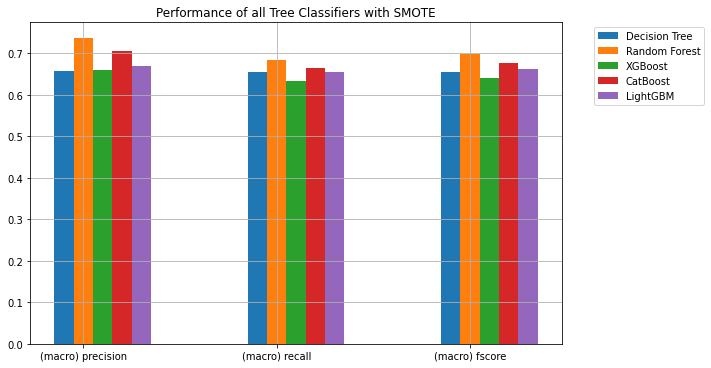

In [ ]:
r = np.arange(3)
width = 0.1

plt.figure(figsize=(10,5)) 
bar1 = plt.bar(r, report_dtree_smote_best, width=width)
bar2 = plt.bar(r + width, report_rf_smote_best, width=width)
bar3 = plt.bar(r + 2*width, report_xgb_smote_best, width=width)
bar4 = plt.bar(r + 3*width, report_cb_smote_best, width=width)
bar5 = plt.bar(r + 4*width, report_gbm_smote_best, width=width)


plt.grid('True')
plt.xticks(r+width,['(macro) precision', '(macro) recall', '(macro) fscore'])
plt.legend( (bar1, bar2, bar3, bar4, bar5), \
            ('Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost', 'LightGBM'), \
            bbox_to_anchor=(1.05, 1.0), loc='upper left' )
plt.tight_layout()
plt.title('Performance of all Tree Classifiers with SMOTE')

plt.show()

**Observation**: For this toy problem, Random Forest and CatBoost seem to have best performance compared with all other Tree Classifiers. 

